# **TEAM 22 : Similar Places Recommendation System for Sustainable Tourism**

 **Hari Chandan Gooda UBIT : 50614165**

 **Pramila Yadav UBIT : 50613803**
 
 **Tharunnesh Ramamoorthy UBIT : 50611344**
 
 **Keshav Narayan Srinivasan UBIT : 50610509**

# **TASK 1: PROBLEM STATEMENT**

Tourism has grown tremendously over the past two decades, majorly because of affordable transport fares and rise in middle class population. But being mostly aware of popular places, a large proportion of tourists choose to visit those places, causing overcrowding. As a result, we see reports of huge demand over resources and a surge in pollution in such places. By studying the data, we aim to understand the patterns in tourism and suggest similar yet less popular places that will promote sustainable tourism. In other words, we want to reduce the repercussions caused by overcrowding in certain places and also, let people know about new and exciting places.

# **TASK 3: DATA RETRIEVAL**

We have planned to use the dataset from Google maps, hence we have used few scraping techniques such as seleniuma nd scrapy with the help of certain scraping guides to create our dataset for 4000 tourism places in the United States of America. The dataset contains data pertaining to popularity controls, Working hours and location that can give us some meaningful data that we can work with. It is completely unstructured and we have to clean it accordingly to get the data and modeling we want to do in the future for this project.

**Loading our Scraped Dataset which needs to be cleaned** 

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "Data.csv"
df = pd.read_csv(file_path)

**DATA CLEANING**
1) Handling missing values in important columns 

In [3]:
df_cleaned = df.dropna(subset=['latitude', 'popular_times', 'longitude', 'rating'])

2) Converting Cities and States to a unified format

In [4]:

df_cleaned['city'] = df_cleaned['city'].str.lower()
df_cleaned['us_state'] = df_cleaned['us_state'].str.lower()
df_cleaned['city'] = df_cleaned['city'].str.capitalize()
df_cleaned['us_state'] = df_cleaned['us_state'].str.capitalize()

3) Normalizing the working hours for time consistent format

In [5]:
df_cleaned['working_hours'] = df_cleaned['working_hours'].astype(str)
df_cleaned['working_hours'] = df_cleaned['working_hours'].apply(lambda x: re.sub(r'[a-zA-Z\s]+', '', x))
df_cleaned['working_hours'] = df_cleaned['working_hours'].fillna('Unknown')

def get_weekday_hours(working_hours):
    try:
        parts = working_hours.split(':')
        weekday_parts = parts[:5]
        weekday_hours = sum(1 for part in weekday_parts if part.strip())
        return weekday_hours
    except Exception as e:
        return 0 

def get_weekend_hours(working_hours):
    try:
        parts = working_hours.split(':')
        weekend_parts = parts[5:7]
        weekend_hours = sum(1 for part in weekend_parts if part.strip())
        return weekend_hours
    except Exception as e:
        return 0  
    
df_cleaned['weekday_hours'] = df_cleaned['working_hours'].apply(get_weekday_hours)
df_cleaned['weekend_hours'] = df_cleaned['working_hours'].apply(get_weekend_hours)


4) Making the names uniform by applying title case

In [6]:
df_cleaned['name'] = df_cleaned['name'].str.title()

5) Removing invalid latitude and longitude range and bringing precision to them

In [7]:
df_cleaned = df_cleaned[(df_cleaned['latitude'].between(-90, 90)) & (df_cleaned['longitude'].between(-180, 180))]
df_cleaned['latitude'] = df_cleaned['latitude'].round(6)
df_cleaned['longitude'] = df_cleaned['longitude'].round(6)

6) Creating a new column 'rating_category' based on 'rating' (with tiers as low, medium, high)

In [8]:
df_cleaned['rating_category'] = pd.cut(df_cleaned['rating'], bins=[0, 3, 4.5, 5], labels=['Low', 'Medium', 'High'])

7) Removing the whitespace from following columns

In [9]:
df_cleaned['name'] = df_cleaned['name'].str.strip()
df_cleaned['city'] = df_cleaned['city'].str.strip()

8) Introducing a new column 'is_weekend_open' based on 'working_hours' to check if locations are open on weekends

In [10]:
def has_values_after_colon(working_hours):
    try:
        parts = working_hours.split(':')
        if len(parts) > 6 and parts[6].strip(): 
            return True
        if len(parts) > 7 and parts[7].strip():
            return True
        return False
    except Exception as e:
        return False

df_cleaned['is_weekend_open'] = df_cleaned['working_hours'].apply(has_values_after_colon)

9) Convertings 'rating' column to numeric data if any inconsitency

In [11]:
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['rating'])


10) Creating columns 'weekday_hours'and 'weekend_hours'

In [12]:
df_cleaned['working_hours'] = df_cleaned['working_hours'].apply(lambda x: re.sub(r'[^\d:-]', '', x))
df_cleaned['weekday_hours'] = df_cleaned['working_hours'].apply(get_weekday_hours)
df_cleaned['weekend_hours'] = df_cleaned['working_hours'].apply(get_weekend_hours)

11) Standardize the 'rating' column by scaling it to a range of 0 to 5

In [13]:
df_cleaned['rating_scaled'] = (df_cleaned['rating'] / df_cleaned['rating'].max()) * 5
df_cleaned.to_csv("C:\\Users\\kesha\\OneDrive\\UB\\Fall 2024\\Data Intensive Computing\\Project\\Data_3.csv")


# **Task 2**
Name: Tharunnesh Ramamoorthy   Ub person id:50611344

Question1 : Does the availability of weekend hours impact the customer ratings?

How it leads to our objective: So this helps our model to consider the tourism during weekends and helps in modeling a better recommendation system. 

Why it is significant: The availability of these popular places attracts local tourism we need to observe if it has a capacity to accommodate tourists outside local regions. 

Question 2: Is there a geographical pattern in the popularity of locations based on longitude and latitude?

How it leads to our objective: This is important for developing the objective recommendations in a feasible tourism that showcasing the destination that align with geographical preferences.

Why it is significant: It will identifies whether there are particular geographical region like longitudes and latitudes that are more popular will provide a awareness to the tourists. It helps to determine whether it is environmental-friendly destination in particular areas attracts more tourists.

# **TASK 5: EDA for the Questions**

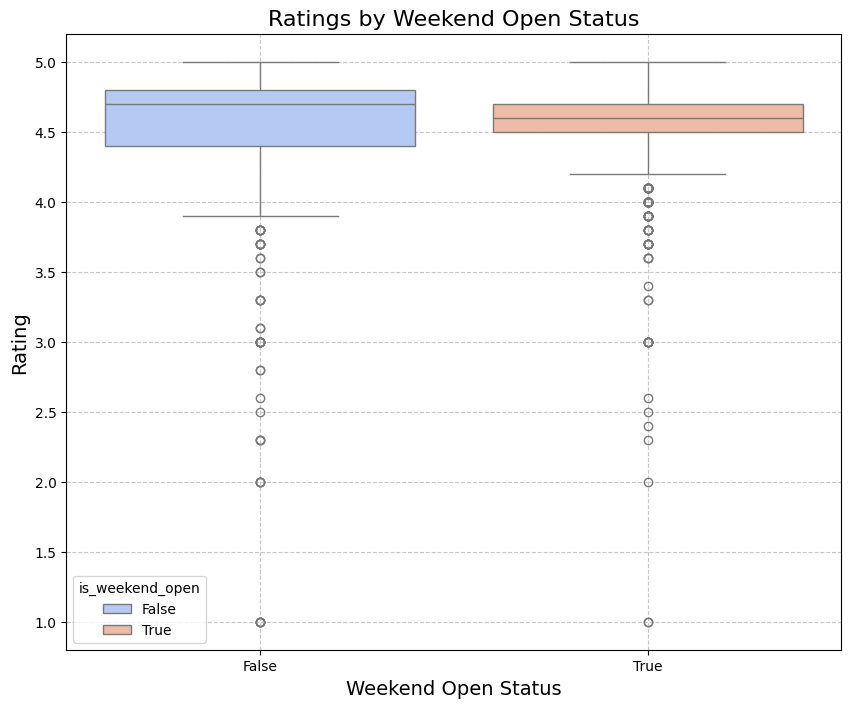

In [14]:
# Hypothesis 1: Difference in ratings between weekend open vs not
plt.figure(figsize=(10, 8))
sns.boxplot(x='is_weekend_open', y='rating', data=df_cleaned, hue='is_weekend_open', palette='coolwarm')
plt.title('Ratings by Weekend Open Status', fontsize=16)
plt.xlabel('Weekend Open Status', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

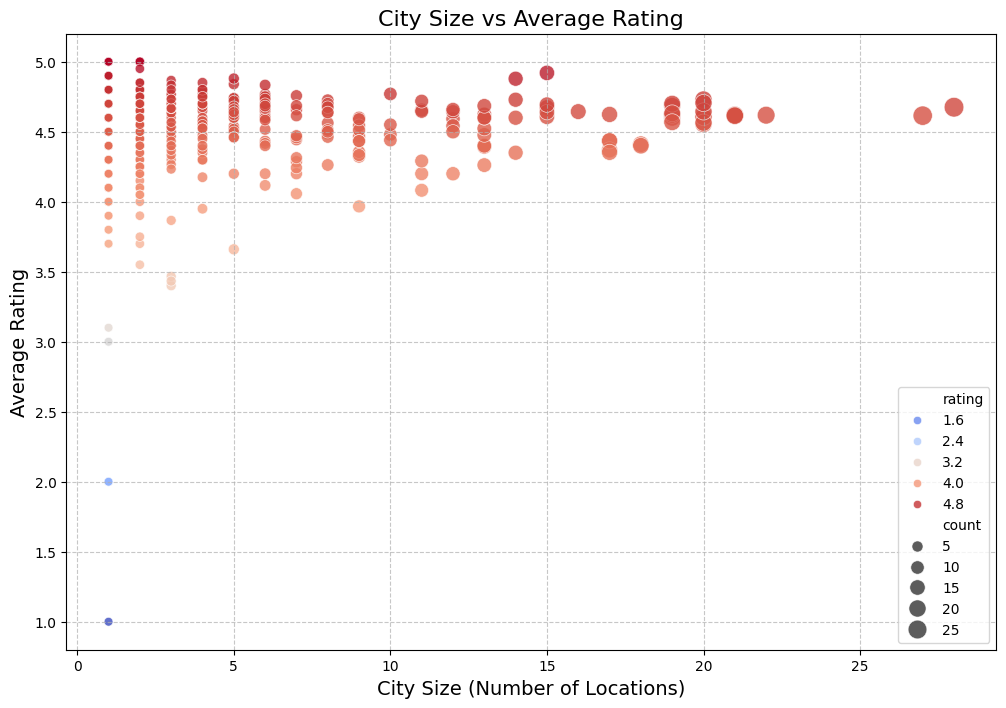

In [15]:
# Hypothesis 2: Average ratings in large vs small cities
city_rating_count = df_cleaned.groupby('city')['rating'].mean().reset_index()
city_size = df_cleaned['city'].value_counts().reset_index()
city_size.columns = ['city', 'count']
city_data = pd.merge(city_rating_count, city_size, on='city')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='count', y='rating', data=city_data, hue='rating', palette='coolwarm', size='count', sizes=(40, 200), alpha=0.8)
plt.title('City Size vs Average Rating', fontsize=16)
plt.xlabel('City Size (Number of Locations)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()